<a href="https://colab.research.google.com/github/pringleshu/2025-1_CV/blob/main/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# YOLOv5 레포지토리 클론
!git clone https://github.com/ultralytics/yolov5

# 클론된 디렉토리로 이동
%cd yolov5

#  필요 라이브러리 설치
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.59 MiB | 11.22 MiB/s, done.
Resolving deltas: 100% (11992/11992), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00

In [2]:
# COCO128 데이터셋 다운로드 및 압축 해제
!curl -L "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  6845k      0 --:--:-- --:--:-- --:--:-- 21.9M


In [3]:
# YOLOv5s 모델 학습 실행
!python train.py --img 640 --batch 16 --epochs 50 --data coco128.yaml --weights yolov5s.pt --project ./runs/train --name my_yolo_exp

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-20 03:41:54.587498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750390914.857578    1456 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750390914.930753    1456 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

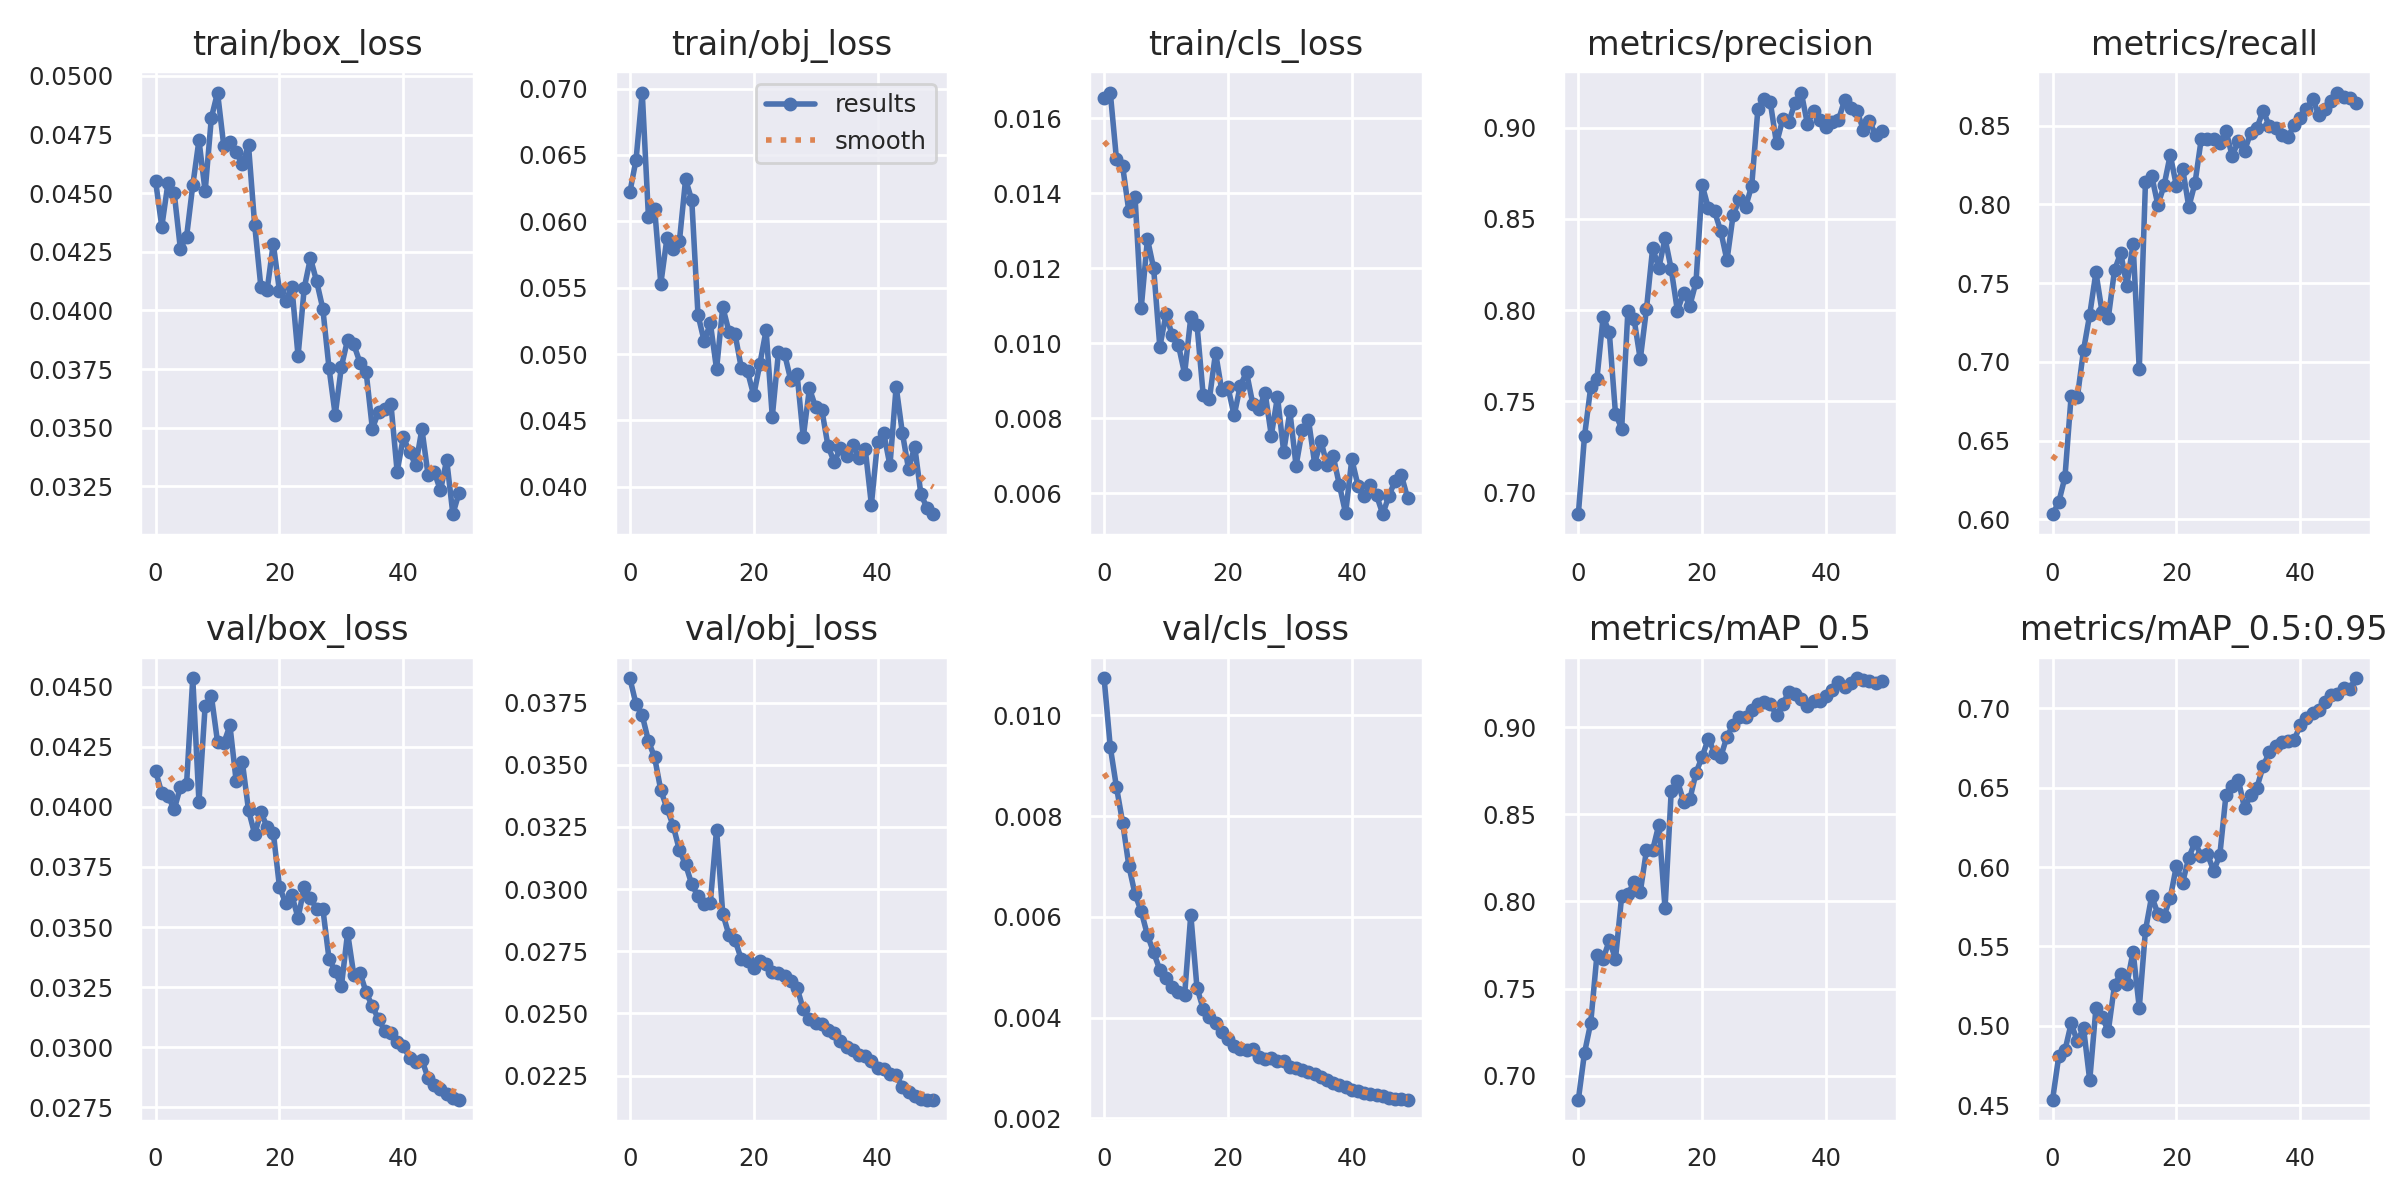

In [4]:
from IPython.display import Image

# 학습 결과 그래프 이미지 표시
Image(filename='runs/train/my_yolo_exp/results.png', width=800)

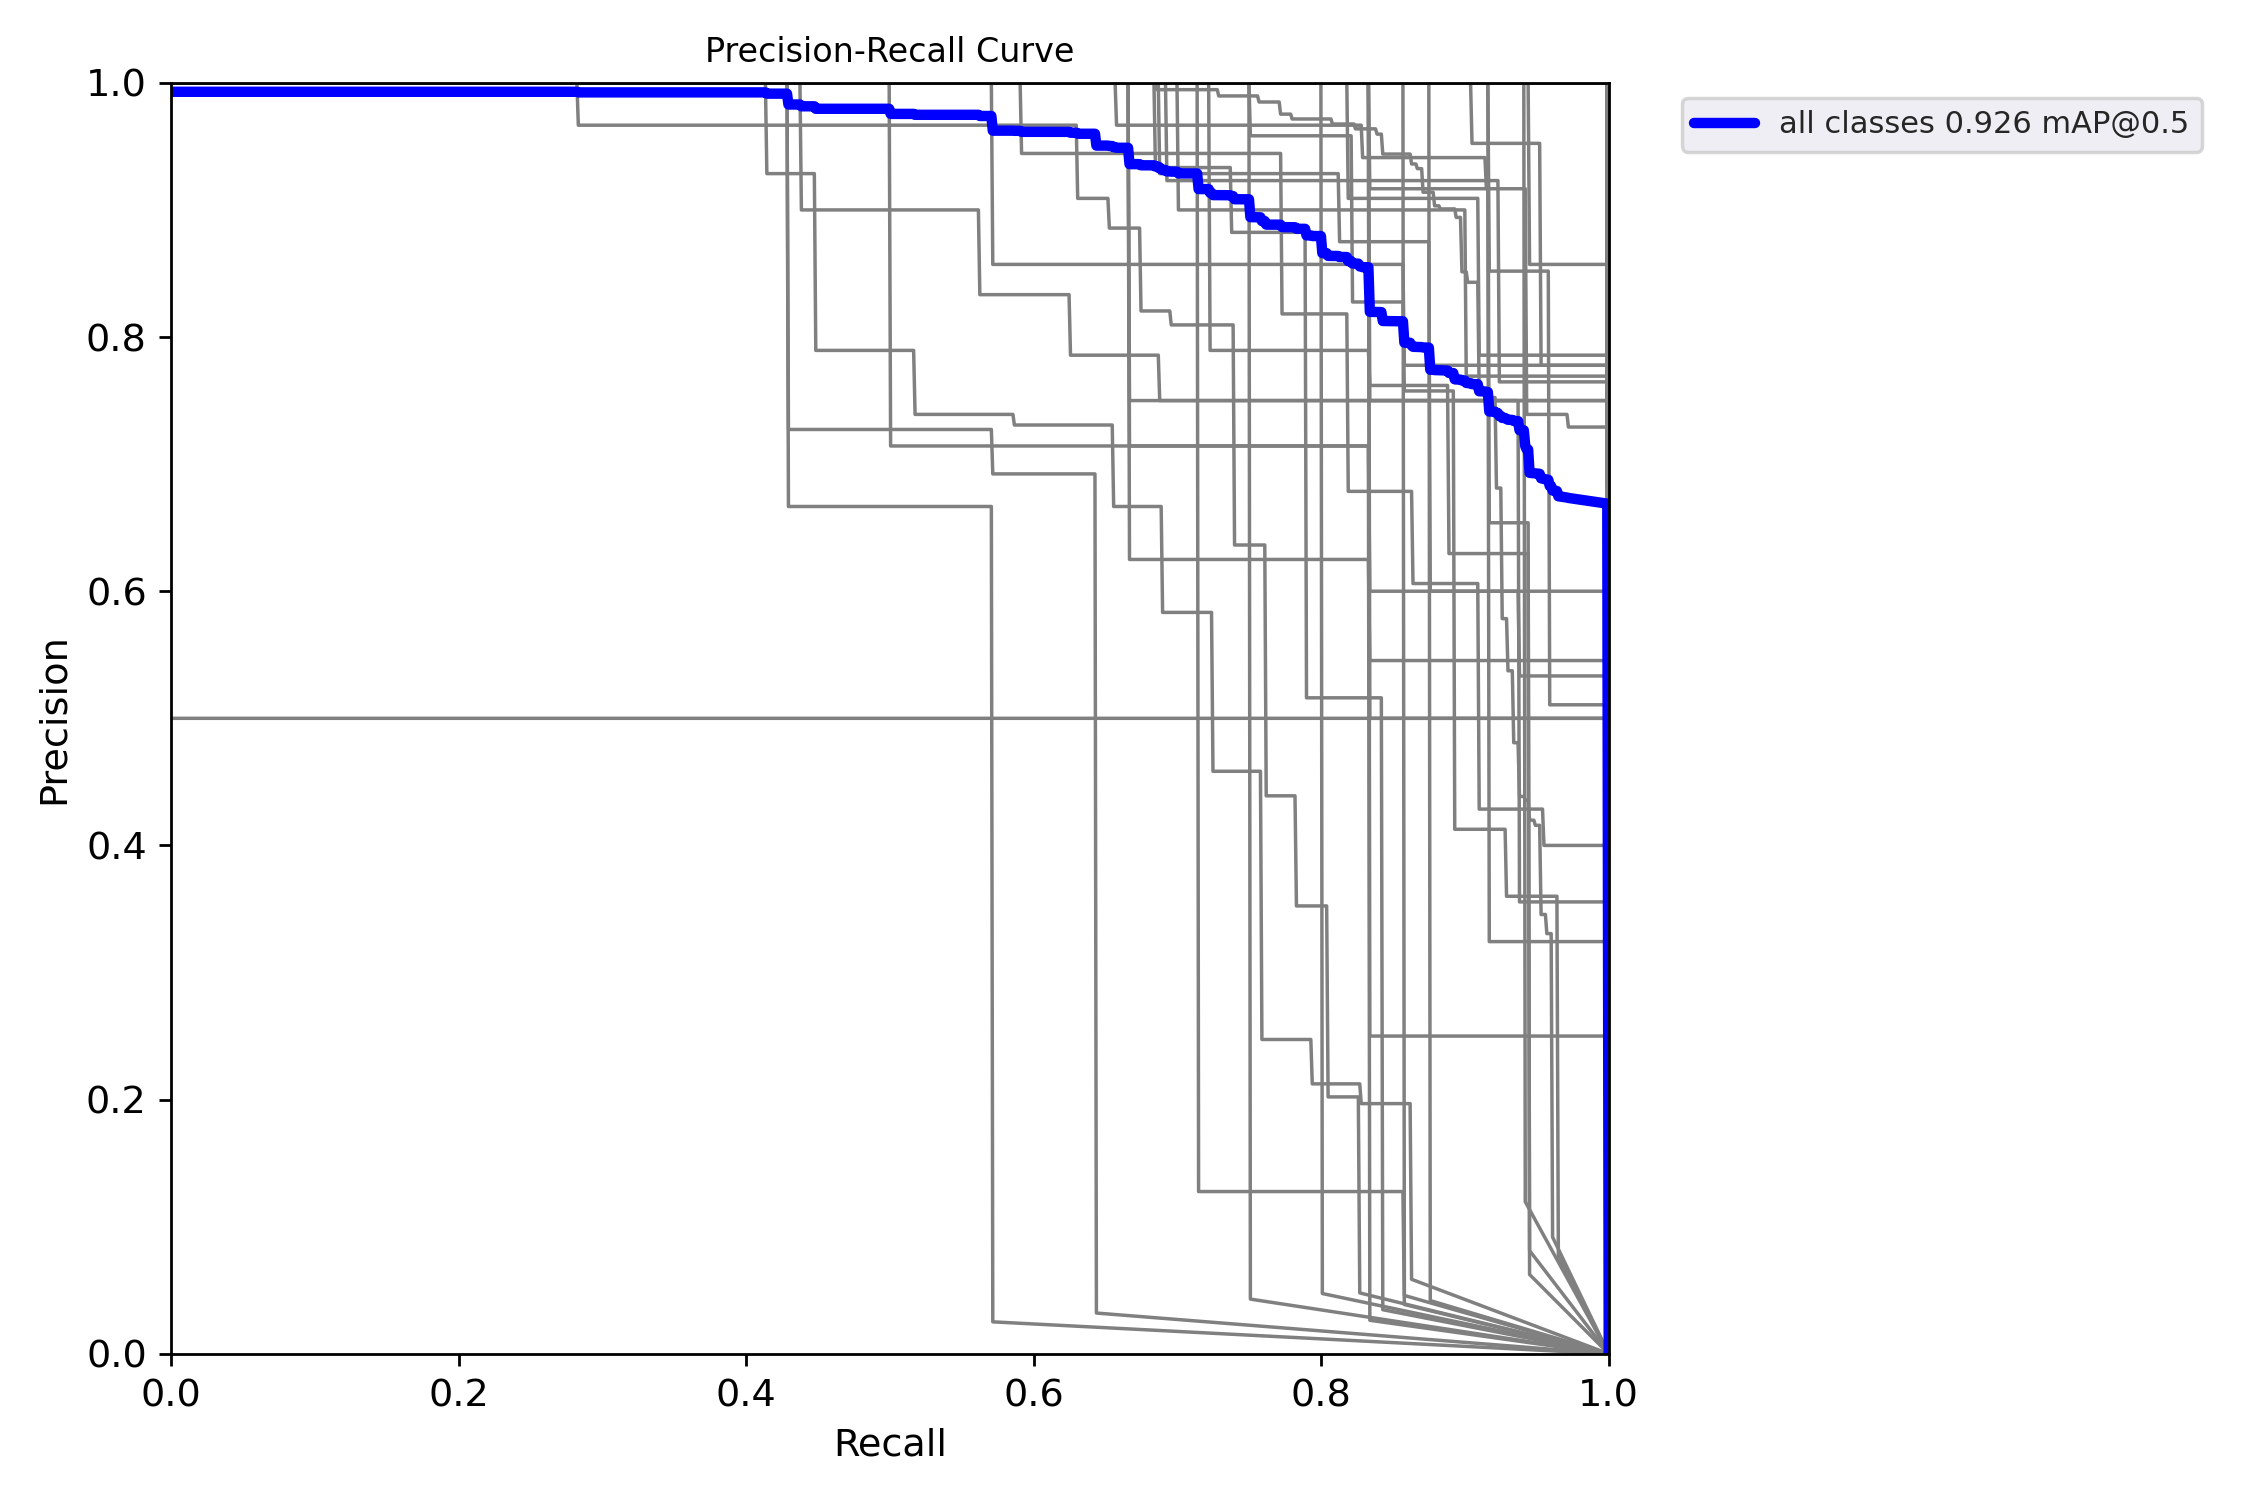

In [5]:
# PR Curve 이미지 표시
Image(filename='runs/train/my_yolo_exp/PR_curve.png', width=700)

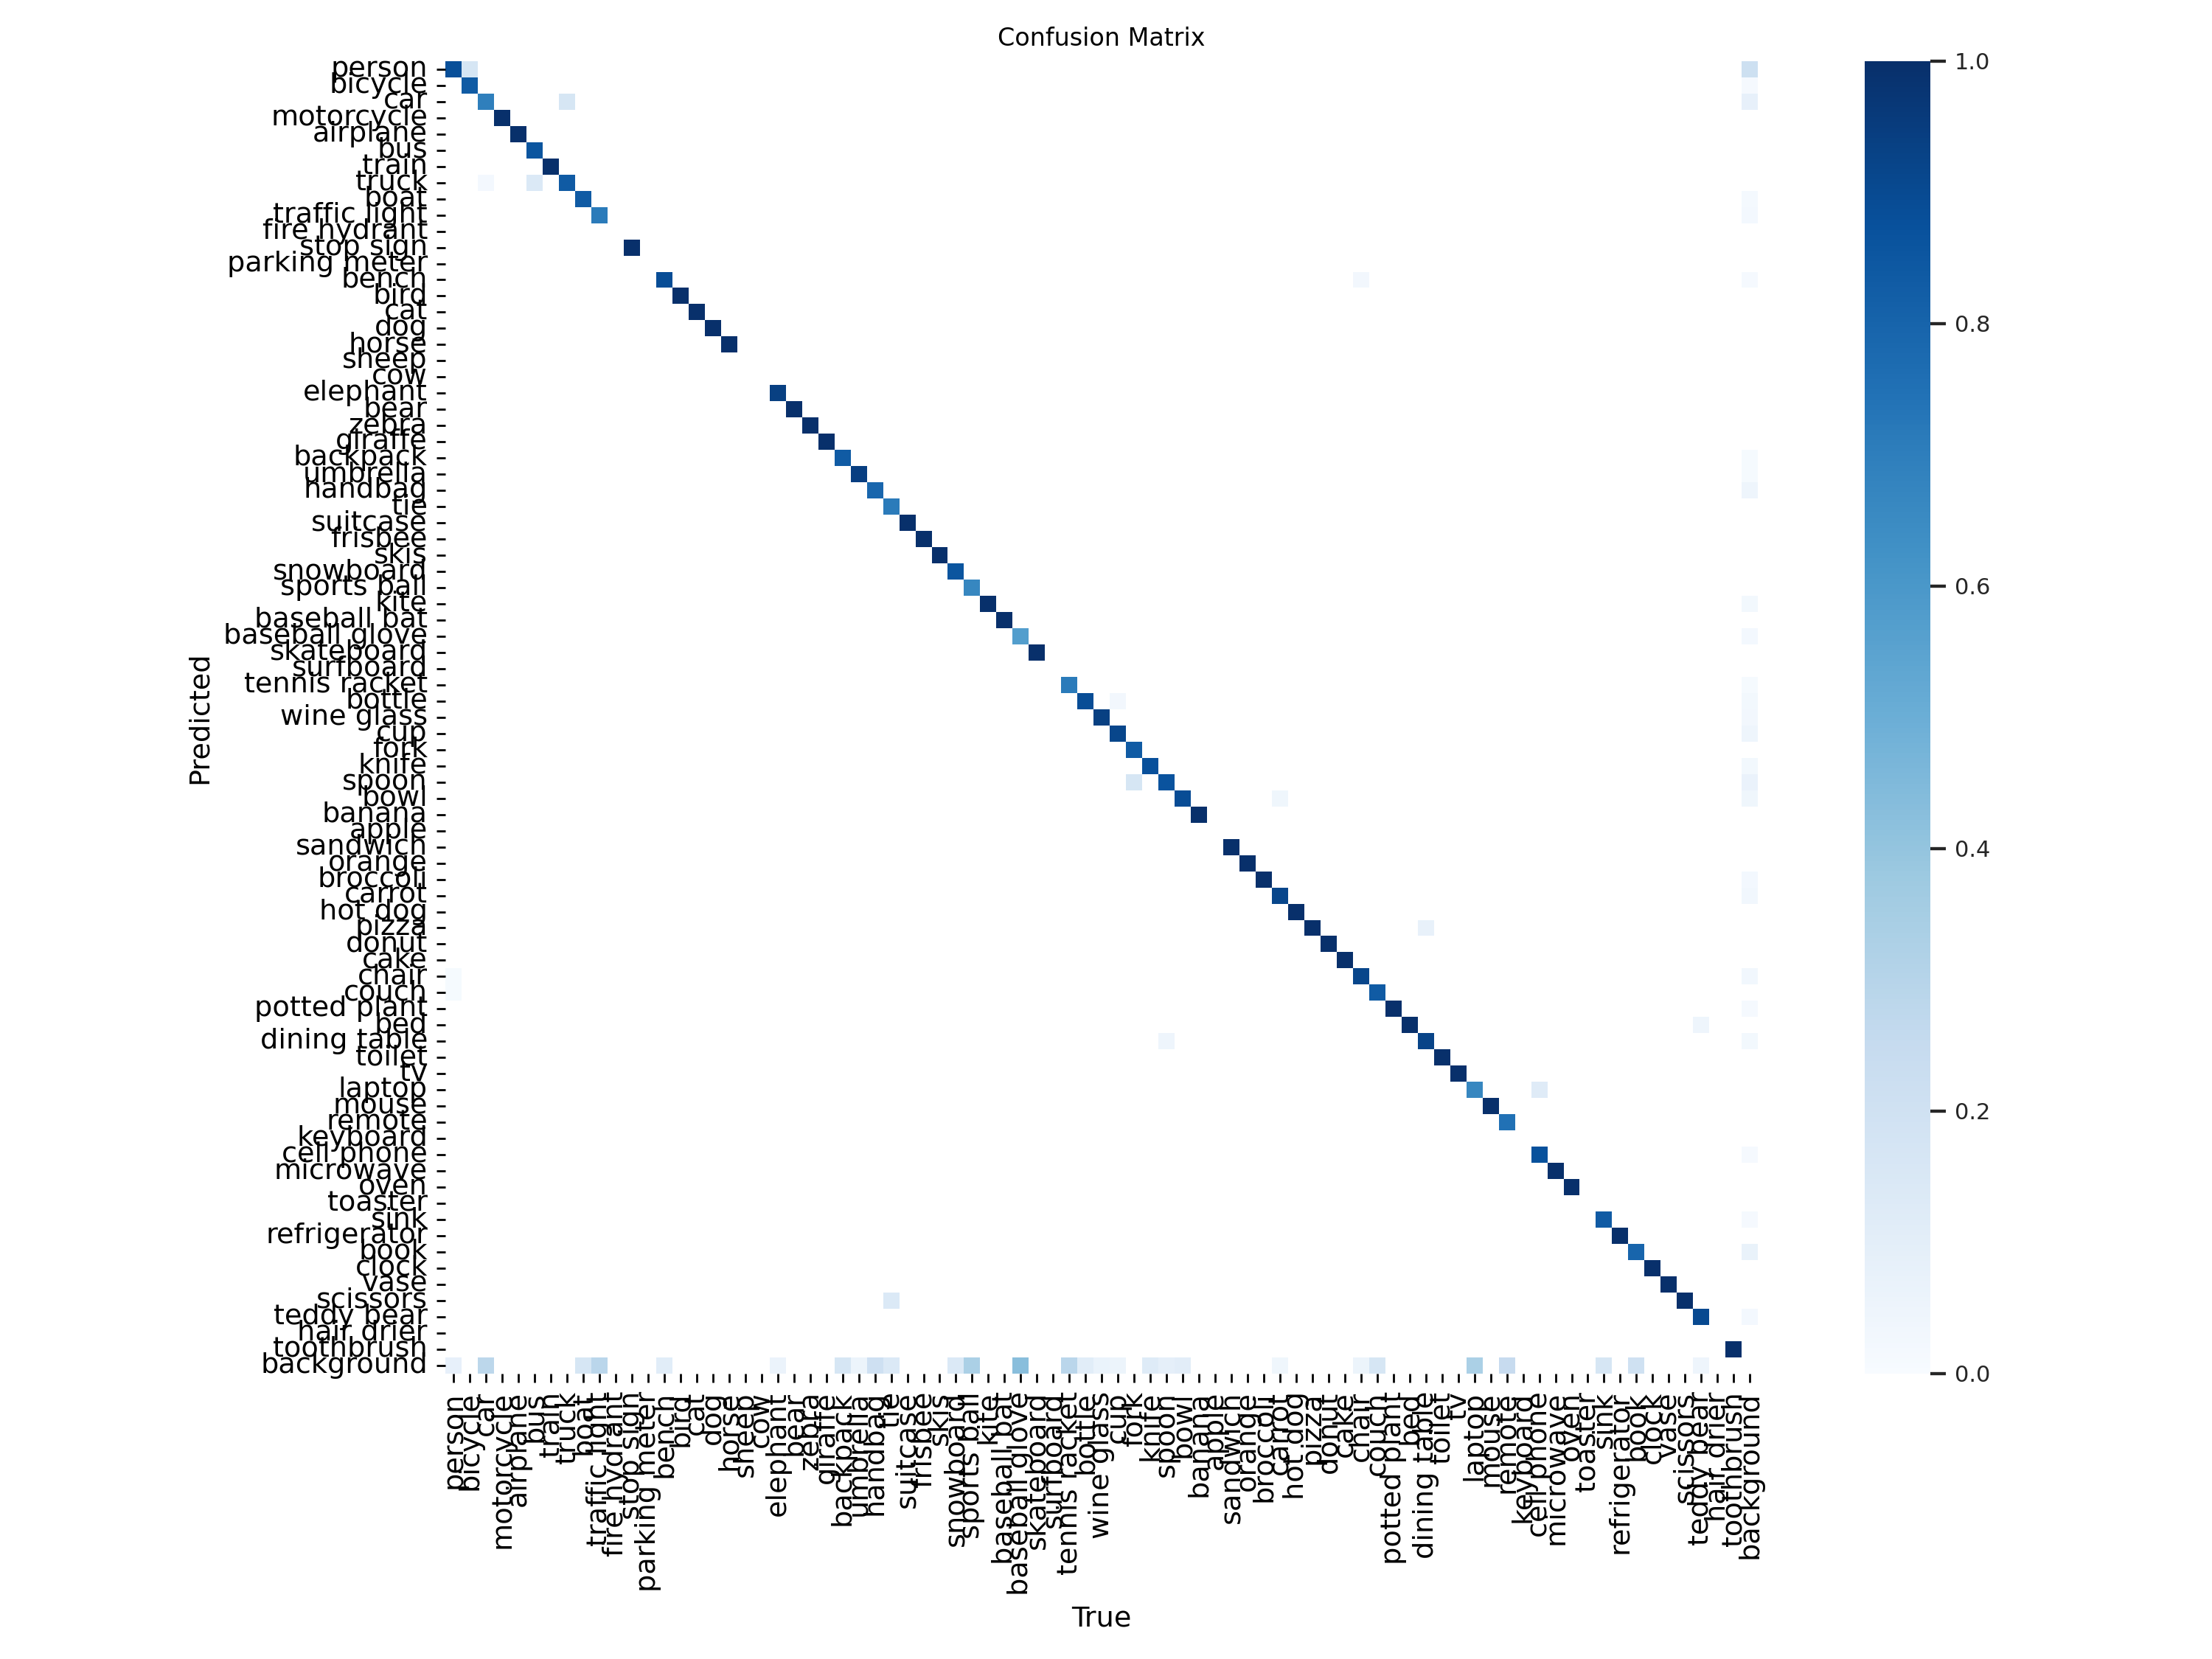

In [6]:
# Confusion Matrix 이미지 표시
Image(filename='runs/train/my_yolo_exp/confusion_matrix.png', width=700)

In [7]:
# 학습된 best.pt 가중치를 사용하여 추론 수행
# --source data/images: coco128의 기본 이미지들을 대상으로 추론
!python detect.py --weights runs/train/my_yolo_exp/weights/best.pt --img 640 --source data/images

detect: weights=['runs/train/my_yolo_exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 29.0ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 32.9ms
Speed: 0.5ms pre-process, 30.9ms inference, 61.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


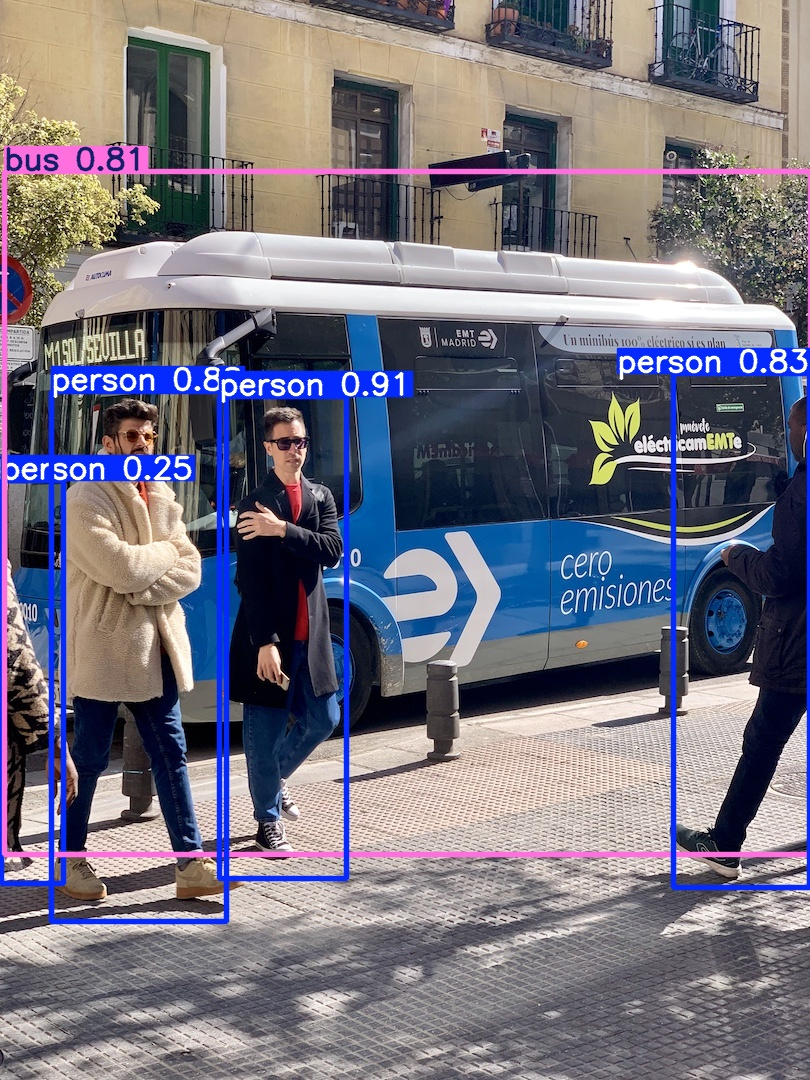

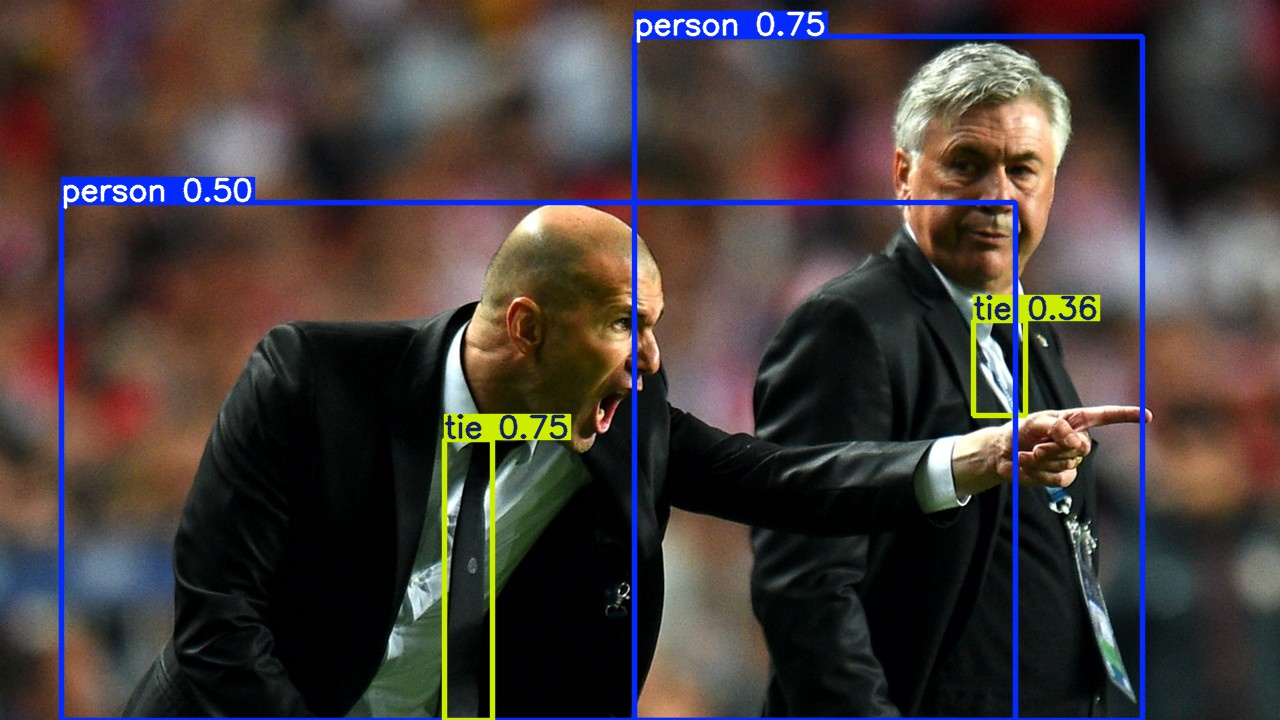

In [8]:
import glob
from IPython.display import display

# 가장 최근의 추론 결과 폴더에서 이미지들을 찾아 표시
latest_detect_run = sorted(glob.glob('runs/detect/exp*'))[-1]
for image_path in glob.glob(f'{latest_detect_run}/*.jpg'):
      display(Image(filename=image_path, width=600))

In [9]:
import pandas as pd

# 학습 결과 csv 파일 읽기
results_df = pd.read_csv('runs/train/my_yolo_exp/results.csv')

# 컬럼 이름의 공백 제거
results_df.columns = results_df.columns.str.strip()

# 마지막 epoch의 성능 지표 추출
final_epoch_results = results_df.iloc[-1]

mAP_0_5 = final_epoch_results['metrics/mAP_0.5']
mAP_0_5_0_95 = final_epoch_results['metrics/mAP_0.5:0.95']
precision = final_epoch_results['metrics/precision']
recall = final_epoch_results['metrics/recall']

print(f"mAP@0.5: {mAP_0_5:.4f}")
print(f"mAP@0.5:0.95: {mAP_0_5_0_95:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

mAP@0.5: 0.9268
mAP@0.5:0.95: 0.7190
Precision: 0.8983
Recall: 0.8644


In [10]:
import time
import glob

# 테스트할 이미지 10장 선택
image_files = glob.glob('data/images/*.jpg')[:10]
image_list_str = " ".join(image_files)

# 추론 시간 측정
start_time = time.time()
# --nosave 옵션으로 결과 이미지를 저장하지 않아 순수 속도 측정
!python detect.py --weights runs/train/my_yolo_exp/weights/best.pt --img 640 --source {image_list_str} --nosave
end_time = time.time()

# 총 소요 시간 및 FPS 계산
total_time = end_time - start_time
num_images = len(image_files)
fps = num_images / total_time

print(f"\n--- Inference Speed ---")
print(f"10장 이미지 처리 총 소요 시간: {total_time:.2f} 초")
print(f"평균 FPS (Frames Per Second): {fps:.2f}")


usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--data DATA] [--imgsz IMGSZ [IMGSZ ...]]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-format SAVE_FORMAT] [--save-csv]
                 [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--visualize] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok] [--line-thickness LINE_THICKNESS]
                 [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: data/images/zidane.jpg

--- Inference Speed ---
10장 이미지 처리 총 소요 시간: 5.42 초
평균 FPS (Frames Per Second): 0.37
